# Dask Demo

In [48]:
import xarray as xr
import glob
from distributed import Client
import xwrf

In [5]:
client = Client("tcp://127.0.0.1:40447")
client

<Client: 'tcp://127.0.0.1:40447' processes=4 threads=8, memory=755.55 GiB>

In [52]:
files = glob.glob("/data/project/ARM_Summer_School_2024_Data/lasso_tutorial/cacti/lasso-cacti/20190129/eda09/base/les/subset_d4/corlasso_met_*")

In [54]:
ds = xr.open_dataset(files[0])

In [57]:
ds = xr.open_mfdataset(files[:10],
                       chunks={},
                       coords="minimal")

/opt/conda/lib/python3.11/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 28.39 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 28.39 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 28.39 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 28.39 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/distributed/client.py:3163: UserWarning: Sending large graph

In [65]:
area_mean_t = ds.mean(dim=["south_north", "west_east"])

In [72]:
subset = area_mean_t[["HAMSL", "TEMPERATURE", "QVAPOR", "UA", "VA", "REFL_10CM_MAX"]]

In [73]:
area_mean_t = subset.compute()

In [81]:
area_mean_t = area_mean_t.set_coords("HAMSL")

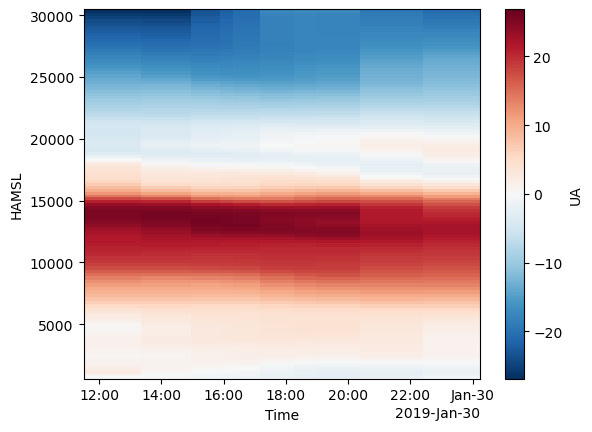

In [86]:
area_mean_t.UA.plot(x='Time', y='HAMSL')

In [88]:
client.shutdown()